In [1]:
import numpy
from sympy import *

In [2]:
def chebyshev_interpolation(polynomial, a, b):
    x = Symbol('x')
    n = degree(polynomial, gen=x)
    polynomial = polynomial - LC(polynomial)*(b - a)**n/2**(2*n-1)*chebyshevt(n, (2*x+a+b)/(b-a))
    return polynomial

In [3]:
def telescoping_method(function, a, b, n_taylor, deg):
    x = Symbol('x')
    polynomial = series(function, x, x0=0, n=n_taylor+1).removeO()
    for _ in range(n_taylor-deg):
        polynomial = chebyshev_interpolation(polynomial, a, b)
    return polynomial

In [4]:
x = Symbol('x')
function = ln(1+x)
a = -1
b = 1
n_taylor = 15
deg = 5
telescope = telescoping_method(function, a, b, n_taylor, deg)
telescope

1377*x**5/1024 - 309*x**4/256 - 2881*x**3/6144 - 61*x**2/8192 + 18325*x/16384 - 55091/1720320

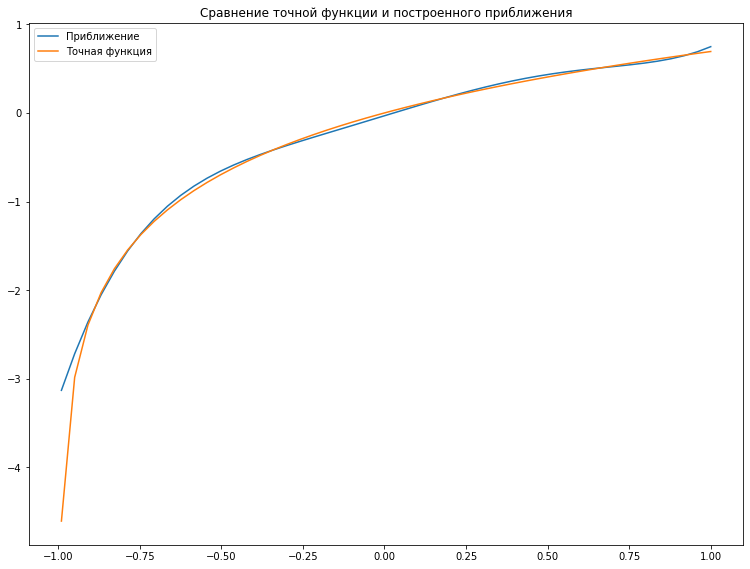

In [5]:
import matplotlib.pyplot as plt
import numpy as np
space = np.linspace(-0.99, 1)
plt.figure(figsize=(12.8, 9.6))
plt.title('Сравнение точной функции и построенного приближения')
plt.plot(space, lambdify(x, telescope, 'numpy')(space), label='Приближение')
plt.plot(space, lambdify(x, ln(1+x), 'numpy')(space), label='Точная функция')
plt.legend()
plt.show()